In [1]:
# customer_segmentation.ipynb

# Importing the necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [2]:
# Load the data
# The customer data CSV file is loaded here
data = pd.read_csv('data/customer_data.csv')

# Show the first few rows of the dataset to understand its structure
data.head()
# Data Preprocessing

# Check for missing values
print("Missing Values:", data.isnull().sum())

# Convert 'Gender' to binary (Male = 1, Female = 0)
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Checking the basic statistics of the data
print(data.describe())


Missing Values: CustomerID         0
Age                0
AnnualIncome       0
SpendingScore      0
Gender             0
Region             0
LoyaltyStatus      0
ProductCategory    0
dtype: int64
        CustomerID        Age   AnnualIncome  SpendingScore     Gender  \
count    15.000000  15.000000      15.000000      15.000000  15.000000   
mean   1008.000000  36.000000   79666.666667      66.333333   0.466667   
std       4.472136   9.539392   26337.552405      17.471065   0.516398   
min    1001.000000  23.000000   45000.000000      30.000000   0.000000   
25%    1004.500000  28.500000   57500.000000      57.500000   0.000000   
50%    1008.000000  34.000000   75000.000000      65.000000   0.000000   
75%    1011.500000  43.000000   97500.000000      77.500000   1.000000   
max    1015.000000  52.000000  125000.000000      95.000000   1.000000   

       LoyaltyStatus  
count      15.000000  
mean        0.600000  
std         0.507093  
min         0.000000  
25%         0.000000 

In [3]:
# Normalize the data (Scaling the numerical features for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'AnnualIncome', 'SpendingScore']])


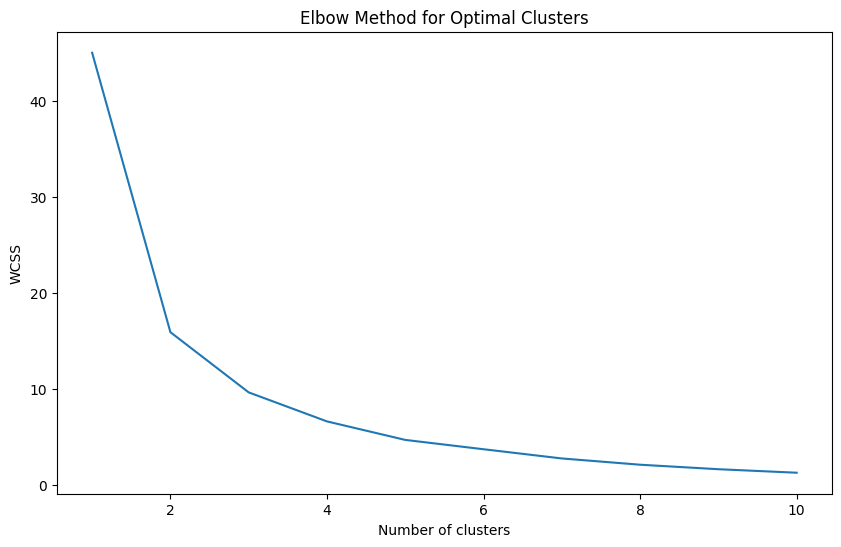

In [4]:
# Perform K-Means clustering for customer segmentation

# Let's determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to visually determine the "elbow" (optimal clusters)
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

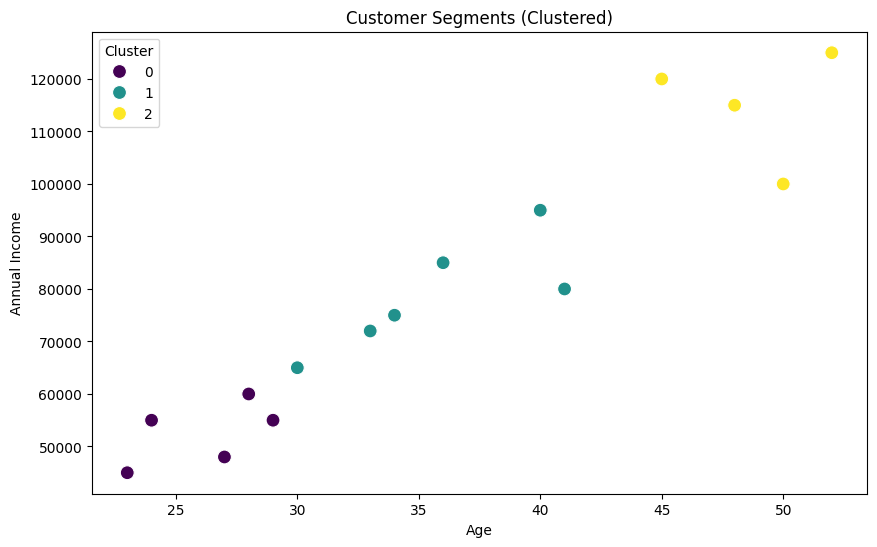

In [5]:
# Based on the elbow method, we choose 3 clusters as the optimal number
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Age'], y=data['AnnualIncome'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments (Clustered)')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend(title='Cluster', loc='best')
plt.show()

In [6]:
# Cluster Profile Analysis (describe each segment)
cluster_profile = data.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'AnnualIncome': ['mean', 'std'],
    'SpendingScore': ['mean', 'std'],
    'LoyaltyStatus': ['mean'],
    'ProductCategory': lambda x: x.mode()[0]  # Most frequent product category per cluster
})

print(cluster_profile)

               Age             AnnualIncome               SpendingScore  \
              mean       std           mean           std          mean   
Cluster                                                                   
0        26.200000  2.588436   52600.000000   6024.948133     79.000000   
1        35.666667  4.226898   78666.666667  10519.822559     69.166667   
2        48.750000  2.986079  115000.000000  10801.234497     46.250000   

                   LoyaltyStatus ProductCategory  
               std          mean        <lambda>  
Cluster                                           
0        14.317821      1.000000          Sports  
1        10.206207      0.666667     Electronics  
2        12.500000      0.000000         Apparel  


In [7]:
# Use Plotly for interactive visualization of customer segments
fig = px.scatter(data, x='Age', y='AnnualIncome', color='Cluster', size='SpendingScore', hover_data=['CustomerID', 'Region', 'ProductCategory'])
fig.update_layout(title='Interactive Customer Segmentation', xaxis_title='Age', yaxis_title='Annual Income')
fig.show()

# Based on the analysis, generate business insights and recommendations in markdown file